In [2]:
import numpy as np
import pandas as pd
import tensorflow.compat.v1 as tf
from koopmanlib.dictionary import PsiNN
from koopmanlib.solver import KoopmanDLSolver
from matplotlib import pyplot as plt

ModuleNotFoundError: No module named 'tensorflow'

In [8]:
# 参数设置
dim = 1  # 数据的特征维度
hidden_dim = 10  # INN 的隐藏层维度
input_dim = 0
n_blocks = 3  # INN 的 RCF 块数
n_layers = 1
n_feature = 5
rank = 3
batch_size = 512
n_train = 10000
n_valid = 1000
n_test = 1000
dropout = 0
num_epochs = 100  # 训练轮数
lamb = 1e-3
learning_rate = 1e-3  # 学习率

In [9]:
X_train = pd.read_csv('single_train.csv', header=None).values
X_valid = pd.read_csv('single_valid.csv', header=None).values
X_test = pd.read_csv('single_test.csv', header=None).values

length = X_train.shape[1] // n_train
H_train = []
for i in range(n_train):
    H_train.append(X_train[:, i*length:(i+1)*length])
H_train = np.stack([H_train[idx].T for idx in range(n_train)], axis=0)
H_valid = []
for i in range(n_valid):
    H_valid.append(X_valid[:, i*length:(i+1)*length])
H_valid = np.stack([H_valid[idx].T for idx in range(n_valid)], axis=0)

In [18]:
data_train = [H_train[:, 0:60,:].reshape(-1, dim), H_train[:, 1:61,:].reshape(-1, dim)]
data_valid = [H_valid[:, 0:60,:].reshape(-1, dim), H_valid[:, 1:61,:].reshape(-1, dim)]
basis_function = PsiNN(layer_sizes=[hidden_dim, hidden_dim, hidden_dim], n_psi_train=dim+n_feature)
solver = KoopmanDLSolver(dic=basis_function,
                             target_dim=dim,
                             reg=0.0)
solver.build(data_train=data_train,
                 data_valid=data_valid,
                 epochs=num_epochs,
                 batch_size=batch_size,
                 lr=learning_rate,
                 log_interval=1,
                 lr_decay_factor=0.92)
    
# df.to_csv("noise.csv", index=False)

Epoch 1/2


/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:372: UserWarning: `build()` was called on layer 'psi_nn_layer_3', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0029 - val_loss: 0.0015
Epoch 2/2
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 1s 773us/step - loss: 0.0015 - val_loss: 0.0013
number of the outer loop: 0
Epoch 1/2
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 1s 798us/step - loss: 0.0013 - val_loss: 0.0011
Epoch 2/2
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 1s 758us/step - loss: 0.0011 - val_loss: 0.0010
number of the outer loop: 1
Epoch 1/2
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 1s 781us/step - loss: 0.0010 - val_loss: 9.7137e-04
Epoch 2/2
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 1s 765us/step - loss: 9.7515e-04 - val_loss: 9.2704e-04
number of the outer loop: 2
Epoch 1/2
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 1s 831us/step - loss: 0.0115 - val_loss: 9.0103e-04
Epoch 2/2
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 1s 782us/step - loss: 9.2476e-04 - val_loss: 9.3208e-04
number of the outer loop: 3
Epoch 1/2
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 1s 789us/step - loss: 8.8290e-04 - val_loss: 8.6594e-04
Epoch 2/2
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 1s 763us/step - loss: 8.82

In [10]:
length = X_test.shape[1] // n_test
H_test = []
for i in range(n_test):
    H_test.append(X_test[:, i*length:(i+1)*length])
H_test = np.stack([H_test[idx].T for idx in range(n_test)], axis=0)

In [19]:
x0_test = H_test[134, :1, :]
x_pred = solver.predict(x0_test, 60)
np.save('single_edmddl.npy', )

In [4]:
x_pred = np.load('single_edmddl.npy')

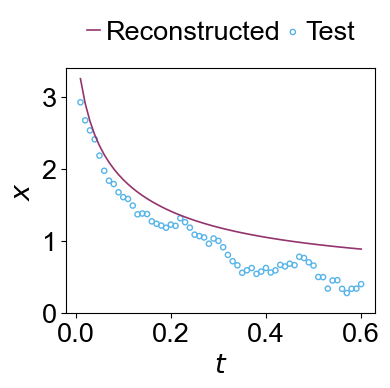

In [18]:
from matplotlib.font_manager import FontProperties
from scipy.interpolate import interp1d

# 字体设置
arial_font = FontProperties(fname="/root/.fonts/arial.ttf", size=19.5)

# === 数据准备 ===
t = np.linspace(0.01, 0.60, num=x_pred.shape[0])

# === 配色设置 ===
line_color = '#94346E'     # 柔和紫红（中位线）
fill_color = '#94346E'     # 同色填充
point_edge = '#56B4E9'     # 测试点边框（淡蓝）

# === 绘图开始 ===
plt.figure(figsize=(4, 4))

# 平滑中位数曲线
plt.plot(t, x_pred, color=line_color, linewidth=1.2, label='Reconstructed')
plt.scatter(t, H_test[134, 1:, :], facecolors='none', edgecolors=point_edge, s=14, linewidths=1.0, label='Test')

# === 坐标轴设置 ===
plt.xlabel('$t$', fontsize=19.5)
plt.ylabel('$x$', fontsize=19.5)
plt.xticks(np.arange(0, 0.61, 0.2), fontsize=8, fontproperties=arial_font)
plt.yticks(np.arange(0, 4, 1), fontsize=8, fontproperties=arial_font)

# === 图例（上方、无边框）===
plt.legend(
    loc='lower center',
    bbox_to_anchor=(0.5, 1.02),
    borderaxespad=0.3,
    ncol=3,
    columnspacing=0.2,
    handletextpad=0.2,
    handlelength=0.5,
    frameon=False,
    fontsize=8,
    prop=arial_font
)

plt.tight_layout()
# plt.savefig("sde1.svg", format='svg', bbox_inches='tight')
plt.show()

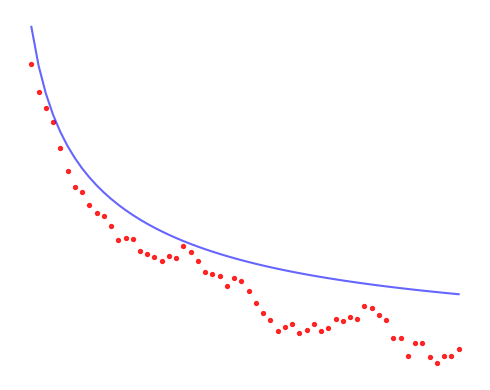

In [21]:
from matplotlib.font_manager import FontProperties
from scipy.interpolate import interp1d

# 字体设置
arial_font = FontProperties(fname="/root/.fonts/arial.ttf", size=19.5)

# === 数据准备 ===
t = np.linspace(0.01, 0.60, num=x_pred.shape[0])

# === 配色设置 ===
line_color = '#94346E'     # 柔和紫红（中位线）
fill_color = '#94346E'     # 同色填充
point_edge = '#56B4E9'     # 测试点边框（淡蓝）

# === 绘图开始 ===
plt.figure(figsize=(5, 4))

# 平滑中位数曲线
plt.plot(t, x_pred, color="blue", linewidth=1.5, alpha=0.6, label='Reconstructed')
plt.scatter(t, H_test[134, 1:, :], s=8, color="red",
            linewidths=1.0, alpha=0.8, label='Test')

# === 坐标轴设置 ===
# plt.xlabel('$t$', fontsize=19.5)
# plt.ylabel('$x$', fontsize=19.5)
# plt.xticks(np.arange(0, 0.61, 0.2), fontsize=8, fontproperties=arial_font)
# plt.yticks(np.arange(0, 4, 1), fontsize=8, fontproperties=arial_font)
plt.xticks([])
plt.yticks([])

# # === 图例（上方、无边框）===
# plt.legend(
#     loc='lower center',
#     bbox_to_anchor=(0.5, 1.02),
#     borderaxespad=0.3,
#     ncol=3,
#     columnspacing=0.2,
#     handletextpad=0.2,
#     handlelength=0.5,
#     frameon=False,
#     fontsize=8,
#     prop=arial_font
# )

plt.tight_layout()
plt.gca().axis('off')
plt.savefig("c4.svg", format='svg', bbox_inches='tight')
plt.show()